**Компромисс дисперсии и смещения**

В этом notebook я надеюсь подробно разобрать вопрос компромиса между смещением (bias) и дисперсией (variance) в машинном обучении.

Вдохновлено соотсветсвующим разделом в <a href="https://www.statlearning.com/">ISLR</a>.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

n = 200

# Введение

Утверждается что средне квадратическую ошибку модели (Mean Square Error, MSE) можно разложить на три составляющие:
- Дисперсию;
- Квардрат смещения;
- Неустранимую ошибку.

Или записывая серез формулу:

$$\mathbb{E}(y_0 - \hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\varepsilon). \tag{1}$$

Где:
- $\hat{f}(x)$ - некоторая модель описывающая данные;
- $x_0$ - некоторое произвольное контрольное значение предикторов;
- $y_0$ - некоторое произвольное контрольное значение оклика;
- $\varepsilon$ - неустранимая ошибка модели (irreducible error); в нее вкладывается та информация о описываемом процессе, которой нет в полученной выборке;
- $Var(\hat{f}(x_0))$ - дисперсия полученной модели; эта величина должна быть тем большем, чем сильнее предстказания модели будут меняться от измениния выбоки;
- $Bias(\hat{f}(x_0))$ - смещение меодли эта величина тем меньше, чем точнее модель подогнанна к описываемому просцессу;
- $Var(\varepsilon)$ - дисперсия неустранимой ошибки; чем полнее и точнее наши данные, тем меньше эта величина;
- $\mathbb{E}(y_0 - \hat{f}(x_0))^2$ - математическое ожидание ошибки полученной модели.

В различных источниках к этой теме очень часто прикладывают график подобный этому:

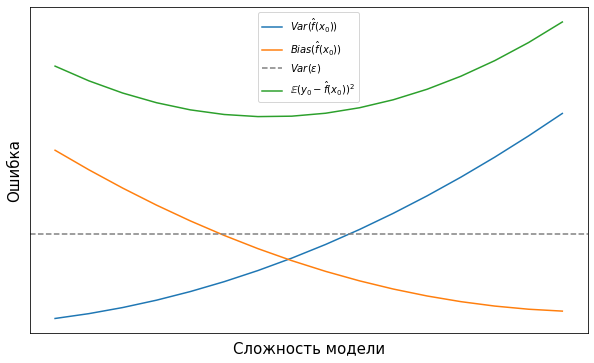

In [2]:
x_plot_range = np.arange(0,0.8, 0.05)
variance = 3*(x_plot_range)**2 + x_plot_range
bias = 3*(x_plot_range)**2 - 4.8*x_plot_range + 2
irrecible_error = 1
model_error = variance + bias + irrecible_error

plt.figure(figsize = [10, 6])
plt.plot(x_plot_range, variance)
plt.plot(x_plot_range, bias)
plt.axhline(irrecible_error, color = "gray", linestyle = "dashed")
plt.plot(x_plot_range, model_error)

plt.xticks([])
plt.yticks([])

plt.xlabel("Сложность модели", fontsize = 15)
plt.ylabel("Ошибка", fontsize = 15)

ans = plt.legend([
    "$Var(\hat{f}(x_0))$",
    "$Bias(\hat{f}(x_0))$",
    "$Var(\\varepsilon)$",
    "$\mathbb{E}(y_0 - \hat{f}(x_0))^2$"
])

Далее я на примере простой задачи регрессии попытаюсь провести такой вычислитеньный эксперимент, который приведет именно к такому графику.

# Идея эксперимента

Пусть имеется некоторый закон распределения связывающий $x_1$ и интерисующую нас величину $y$:

$$f(x)=x^2+x+\varepsilon.$$

In [3]:
y = lambda x: 5*(x**2) - 3*x + 2 + np.random.normal(0, 0.5, x.shape)

Пусть для нашего примера $\varepsilon \sim N(0, 0.5)$. То есть, по определениею нормального распределения $Var(\varepsilon) = 0.5^2=0.25$.

Выберем некоторый прозивольный $x_0$, допустим $x_0=0.8$.

Теперь рассмотрим три выборки размера $n$ генерируемые с помощью описанного закона. На каждой из них мы оценим простую линейную регрессию и представим графики:

- Диаграмму рассеяния $f(x_i), i \in \overline{1,n}$;
- Предсказания полученной модели $\hat{f}(x), \forall x$;
- Реализацию $f(x_0)$ и предсказание получннное по модели $\hat{f}(x_0)$.

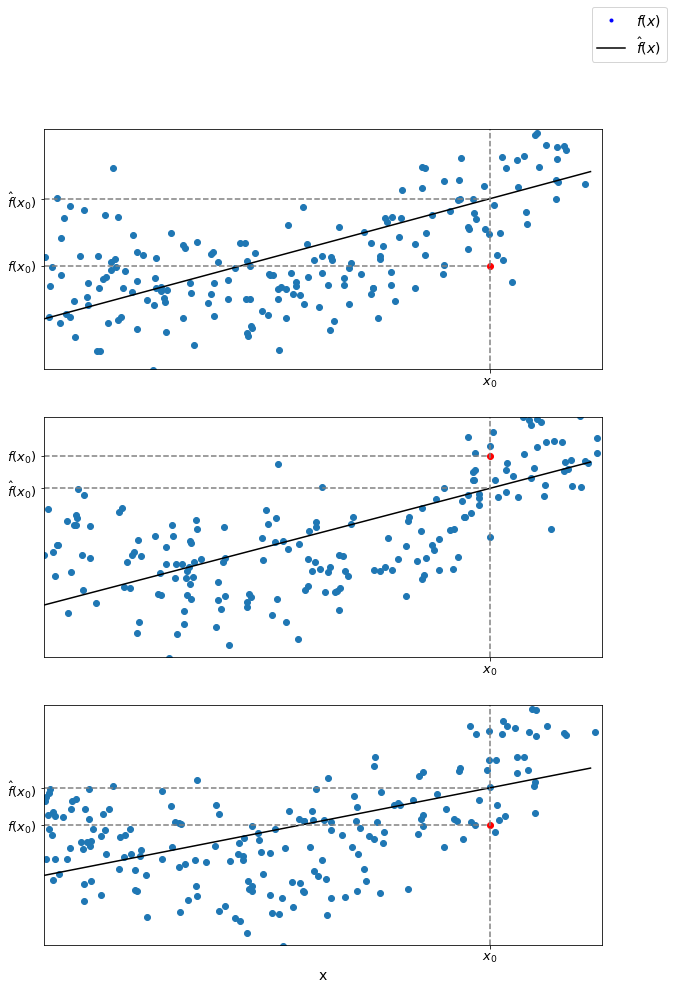

In [4]:
samples_count = 3
x0 =0.8

projection_line_settings = dict(
    color = "gray",
    linestyle = "--"
)

fig = plt.figure(figsize = [10, 15])
np.random.seed(15)

x_ranges = np.random.rand(samples_count, n)
y_ranges = y(x_ranges)

y0_values = y(np.array([x0]*3))
x_arange = np.arange(0, 1, 0.02)


for i, y0 in enumerate(y0_values):
    plt.subplot(310+i+1)
    
    X = x_ranges[i, :]
    Y = y_ranges[i, :]
    
    # scatter
    plt.scatter(
        x_ranges[i, :], y_ranges[i, :]
    )
    plt.scatter([x0], [y0], color = "red")
    
    # model
    model = LinearRegression().fit(X[:, np.newaxis], Y)
    y_arange_hat = model.predict(x_arange[:, np.newaxis])
    plt.plot(
        x_arange, y_arange_hat,
        color = "black"
    )
    
    # projection plots
    plt.axvline(
        x0, **projection_line_settings
    )
    plt.plot(
        [0, x0], [y0, y0],
        **projection_line_settings
    )
    y0_hat = model.predict([[x0]])  
    plt.plot(
        [0, x0], [y0_hat, y0_hat],
        **projection_line_settings
    )
    
    plt.ylim([0.5,3.7])
    plt.xlim([0,1])
    
    plt.xticks([x0], ["$x_0$"], fontsize = 13)
    plt.yticks(
        [y0_hat[0], y0_values[i]], 
        ["$\hat{f}(x_0)$", "$f(x_0)$"], 
        fontsize = 13
    )
    
    
plt.xlabel("x", fontsize = 14)

ans = fig.legend(
    [
        Line2D([], [], linestyle = "None", marker = ".", color = "blue"),
        Line2D([], [], color = "black")
    ],
    ["$f(x)$", "$\hat{f}(x)$"],
    fontsize = 14
)

Теперь имея эти картинки перед глазами легко представить как это должно работать. Повторяя генерацию выборки $m$ раз, можно будет оценить величины:

- $Var[\hat{f}(x_0)]$ - как выборочную дисперию $\hat{f}(x_0)$;
- $[Bias(\hat{f}(x_0))]^2$ - как выборочное среднее величины $[f(x_0) - \hat{f}(x_0)]^2$.

Проделывая это для моделей различных гибкостей будем сохранять полученные оценки и нанесем их на график. В качестве моделей будем использовать алгоритм KNN постепенно изменяя параметр $k$ от $n$ до $1$, то есть переходя от модели с минимальной гибкостью к модели с максмальной гибкостью.

# Реализация эксперимента

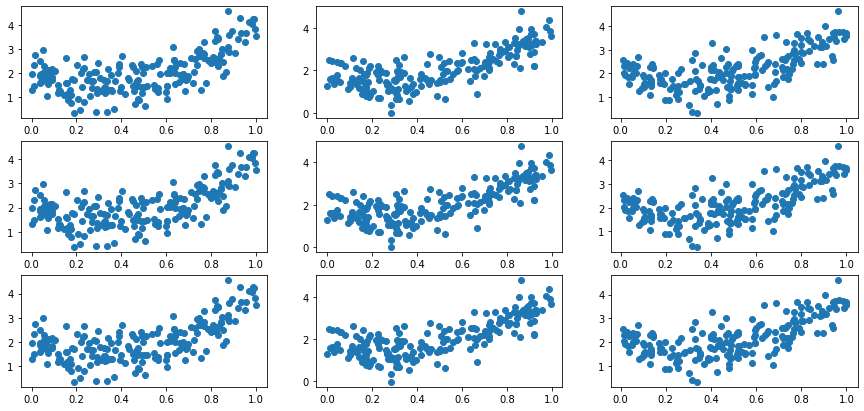

In [78]:
examples_count = 3

x_aranges = np.random.rand(examples_count, n)
y_aranges = y(x_aranges)

plt.figure(figsize = [15, 7])

for i, k in enumerate([1, 5, 10]):
    for j in range(examples_count):
        plt.subplot(330 + (i)*examples_count + j + 1)
        plt.scatter(x_aranges[j,:], y_aranges[j, :])
        model = KNeighborsRegressor(k).fit(
            x_aranges[[j],:].T,
            y_aranges[j,:]
        )

In [56]:
k_vals = np.arange(n, 0, -1)
m = 1000

np.random.seed(10)

def get_results_KNN(x, y, x0, f_x0, k):
    '''
        Оценить KNN и выдать предсказние
        и квадрат отклонения
    '''
    hat_f_x0 = KNeighborsRegressor(k).fit(x, y).predict([[x0]])[0]
    return np.array([hat_f_x0, (hat_f_x0 - f_x0)**2])

x_aranges = np.random.rand(m, n)
y_aranges = y(x_aranges)

var_results = []
bias_results = []
k_arange = np.arange(26, 0, -1)

for k in k_arange:
    f_x0_bias = np.concatenate(
        list(map(
            lambda i: get_results_KNN(
                x_aranges[[i],:].T, y_aranges[i,:], x0, y(np.array([x0]))[0], k
            )[:, np.newaxis],
            range(m)
        )),
        axis = 1
    )

    var_results.append(np.var(f_x0_bias[0]))
    bias_results.append(np.mean(f_x0_bias[1]))

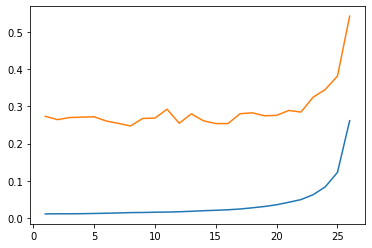

In [59]:
plt.plot(k_arange[::-1], var_results)
plt.plot(k_arange[::-1], bias_results)